<div style="text-align:center">

<img width="400" src="logo_isel.png">

## Licenciatura em Engenharia Informática e Multimédia
## Processamento de Imagem e Visão
### Trabalho prático 1
#### Fábio Dias [A42921] <br> Diogo Ribeiro [A46337]

#### Professor: <br> Eng. Nuno Pinho da Silva

##### 2023-2024

</div>

# Conteúdos
<ul>
    <li> Objetivos </li>
    <li> Descrição </li>
    <li> Desenvolvimento
        <ul>
            <li>Abordagem inicial</li>
            <li>Código e resultados</li>
            <li>Abordagem final </li>
            <li>Código e resultados</li>
        </ul>
    <li> Conclusão </li>
    <li> Bibliografia</li>
</ul>

## Objetivos :
<ol type="a">
<h4>
<li> Desenvolver algoritmo de visão por computador, capaz de contar automaticamente a quantia em dinheiro (moedas), colocado em cima de uma mesa;</li><br>
<li> Familiarização com a biblioteca de funções OpenCV (Open Source Computer Vision) para programação de aplicações de visão por computador em tempo real (para linguagem de programação Python)</li>
</h4>
</ol>

## Descrição
<ol type="a">
<h4>
<li> Pretende-se desenvolver um algoritmo para contagem da quantia em dinheiro (moedas de euro), colocado em cima de uma mesa de superfície homogénea e clara, observada por uma câmara, montada num tripé, ajustado de modo a que o plano do sensor é paralelo ao plano da mesa. </li><br>

<li> O algoritmo deverá possuir alguma robustez relativamente às seguintes perturbações: 
<ol type="i">
    <li> presença de objectos, diferentes de moedas, no campo de visão; </li>
    <li> existência de pequenas sombras; </li>
    <li> eventual contacto dos objectos. </li> </li>
</ol><br>

<li> Serão fornecidos exemplos de imagens de treino que podem ser usadas para o desenvolvimento do algoritmo. </li><br>

<li> O algoritmo será avaliado usando um conjunto de imagens de teste, diferentes das de treino, mas adquiridas nas mesmas condições. </li>

</h4>
</ol>

## Desenvolvimento
<ul>
    <li> <h3> Abordagem inicial </h3>

<h4>
No enunciado deste trabalho prático, foi-nos disponibilizada uma sequência típica de tarefas e operações relacionadas com o desenvolvimento deste algoritmo. <br><br>
<ol>
<li> <p>Carregar as imagens e guardá-las em memória para depois serem manipuladas conforme o nosso objetivo; </li>
<li> <p>Conversão das imagens para tons de cinzento. Assim, a imagem passa de três canais, vermelho, verde e azul para apenas um. Desta forma, é requerido menos processamento e reduz a influência da iluminação, o que destaca melhor o contraste entre as moedas e a mesa; </li>
<li> <p>O passo seguinte é a binarização da imagem. Isto significa que as imagens vão possuir apenas dois valores. Neste caso, 0 ou 255, 0 sendo preto e 255 sendo branco. Mas é necessário especificar o que vai ser branco e o que vai ser preto. Desta forma, podemos usar o algoritmo de Otsu. Este encontra automaticamente um valor para o limiar de decisão entre estes dois grupos. Ou seja, este vai encontrar o valor para um limiar ótimo para cada imagem, de forma adaptativa. Finalizando a binarização, quando visualizamos a imagem, conseguimos observar padrões circulares no fundo preto. Estes serão as moedas; </li>
<li> <p>Este processo não é perfeito. As moedas podem ter circunferências perfeitas, mas buracos no círculo ou baías. Algumas moedas ficam irreconhecíveis ao ponto de não terem um aspeto circular nem parecerem pertencer ao mesmo objeto. Para corrigir isto e tentar obter algo semelhante a uma moeda, precisamos de efetuar operações morfológicas. Estão são um conjunto de técnicas de processamento de imagem utilizadas para modificar a forma de objetos em imagens. São utilizadas para pré-processamento e análise de imagem para melhorar características, como as bordas dos objetos.
<p>Algumas destas operações usadas são a erosão, esta é utilizada para encolher o objeto, separar objetos assim como remover pequenos detalhes e ruído nas imagens; a dilatação, que serve para expandir objetos, preencher alguns buracos e engrossar bordas; outra operação usada foi o fechamento, que é uma operação de dilatação seguida de uma erosão. Esta também é útil para preencher buracos e suavizar contornos. Para estas operações, é necessário ter elementos estruturantes. Estas são máscaras com diferentes tamanhos que percorrem cada pixel na imagem, substituindo o seu valor por um diferente de acordo com a operação desejada. </li>
</ol>
</li>
</h4>
</ul>

### Código

In [145]:
# IMPORTS
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tabulate import tabulate

#### Métodos auxiliares

In [146]:
N_IMAGES = 9

def showImage(imageTitle, image, waitForKey):
    cv2.imshow(imageTitle, image)
    
    if waitForKey:
        cv2.waitKey()
        cv2.destroyAllWindows()
    
def showImageArray(tituloArray, arrayImagens):
    for index in range(len(arrayImagens)):
        if index == len(arrayImagens) - 1:
            showImage(tituloArray + ": " + str(index), arrayImagens[index], True)
        else:
            showImage(tituloArray + ": " + str(index), arrayImagens[index], False)
            
def loadOriginals():
    imagesOriginal = [None] * N_IMAGES
    currentIndex = 0

    for index in range(N_IMAGES):
        while imagesOriginal[index] is None:
            imagesOriginal[index] = cv2.imread("tp1_training_set/moedas_" + str(currentIndex) + ".jpg")
            currentIndex = currentIndex + 1
    
    return imagesOriginal

def plot_images(images):
    TOTAL_IMGS = len(images)
    ROWS = (int)(TOTAL_IMGS / 3)
    COLS = 3
    
    counter = 1
    
    plt.figure(figsize=(20, 13))
    for i in images:
        new = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
        plt.subplot(ROWS, COLS, counter)
        plt.imshow(new)
        plt.title("Imagem " + str(counter))
        plt.axis('off')
        counter = counter + 1
    plt.show()
    

### Importar imagens originais

In [147]:
imagesOriginal = loadOriginals()

#### Conversão para escala de cinzentos

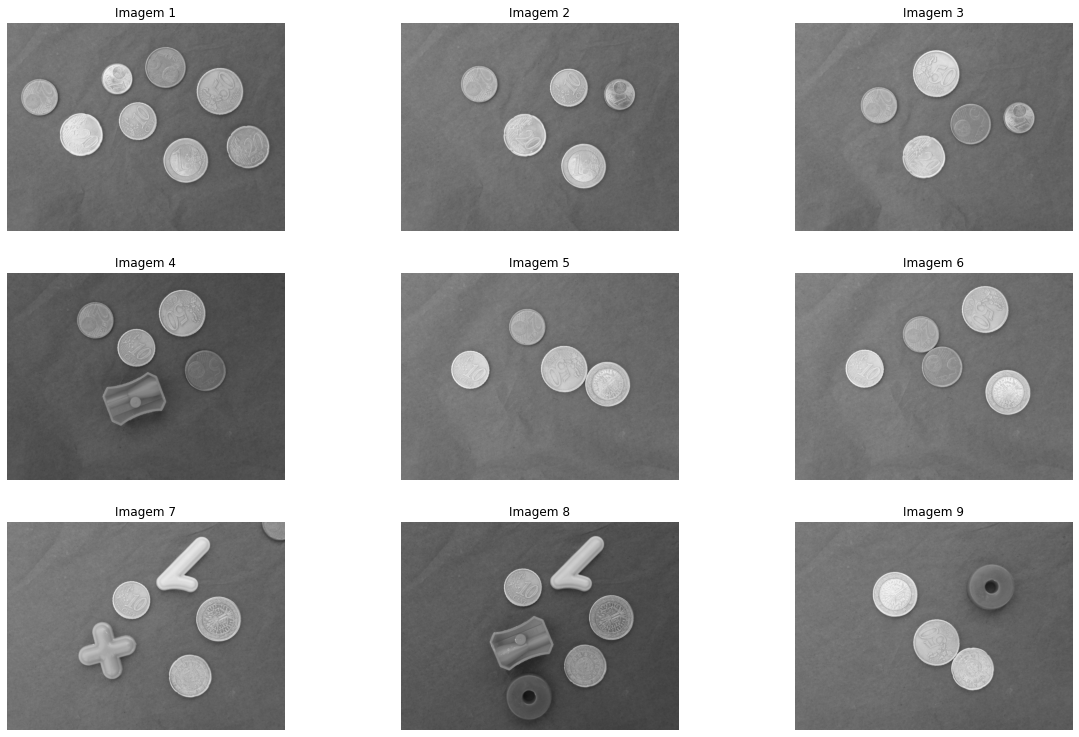

In [148]:
imagesGrayscale = [None] * N_IMAGES

for index in range(N_IMAGES):
    imagesGrayscale[index] = cv2.cvtColor(imagesOriginal[index], cv2.COLOR_BGR2GRAY)
    

plot_images(imagesGrayscale)

#### Obtenção do limiar (threshold) para a binarização das imagens e respetiva conversão usando o algoritmo de Otsu

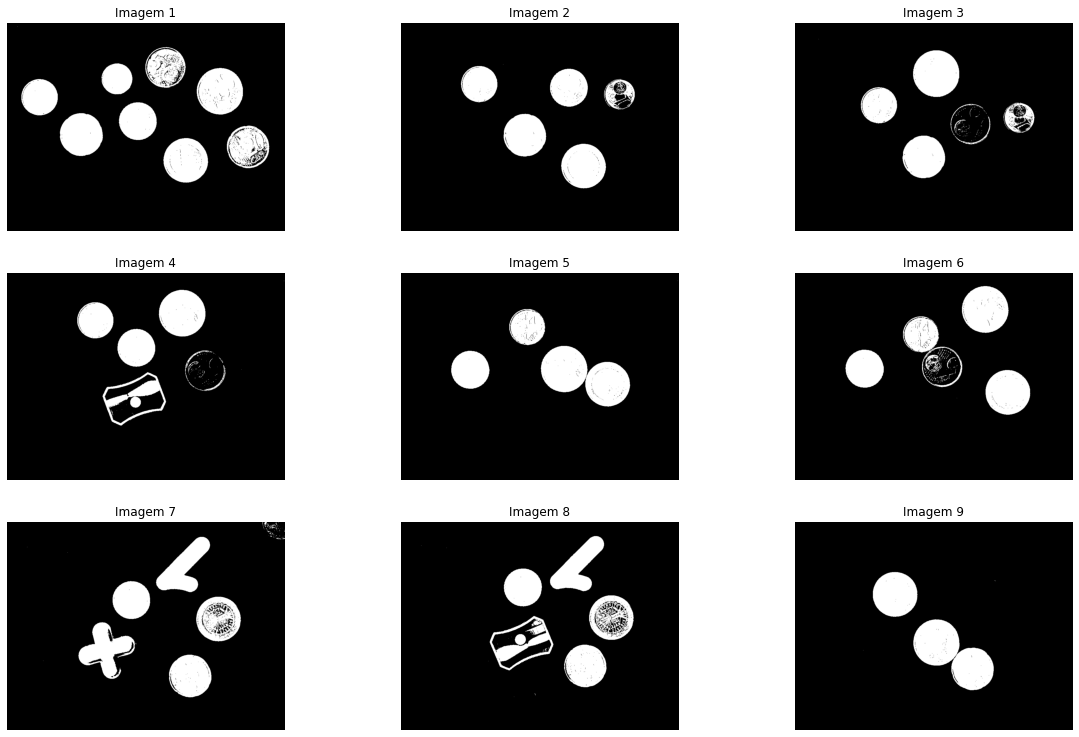

In [149]:
imagesBinary = [None] * N_IMAGES
imagesThresholds = [None] * N_IMAGES

for index in range(N_IMAGES):
    imagesThresholds[index], imagesBinary[index] = cv2.threshold(imagesGrayscale[index], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
plot_images(imagesBinary)

#### Correção/melhoramento das imagens usando operações morfológicas

In [150]:
imagemBinaria = imagesBinary[0]

mascara5x5 = np.ones((5, 5), np.uint8)
mascara5x5[0, 0] = 0
mascara5x5[0, 4] = 0
mascara5x5[4, 0] = 0
mascara5x5[4, 4] = 0

mascara7x7 = np.ones((7, 7), np.uint8)
mascara7x7[0, 0] = 0
mascara7x7[0, 6] = 0
mascara7x7[6, 0] = 0
mascara7x7[6, 6] = 0

mascara9x9 = np.ones((9, 9), np.uint8)
mascara9x9[0, 0] = 0
mascara9x9[0, 8] = 0
mascara9x9[8, 0] = 0
mascara9x9[8, 8] = 0

#Fecho
fechoV1 = cv2.morphologyEx(imagemBinaria, cv2.MORPH_CLOSE, mascara5x5)
fechoV2 = cv2.morphologyEx(fechoV1, cv2.MORPH_CLOSE, mascara5x5)
fechoV3 = cv2.morphologyEx(fechoV2, cv2.MORPH_CLOSE, mascara5x5)

#fecho = [fechoV1, fechoV2, fechoV3] #Várias iterações não tem efeito

fecho5X5 = cv2.morphologyEx(imagemBinaria, cv2.MORPH_CLOSE, mascara5x5)
fecho7X7 = cv2.morphologyEx(imagemBinaria, cv2.MORPH_CLOSE, mascara7x7)
fecho9X9 = cv2.morphologyEx(imagemBinaria, cv2.MORPH_CLOSE, mascara9x9)

imagemBinariaColada = imagesBinary[4]
fecho9X9 = cv2.morphologyEx(imagemBinariaColada, cv2.MORPH_CLOSE, mascara9x9)
contours, hierarchy = cv2.findContours(fecho9X9, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
im = cv2.drawContours(imagesOriginal[4], contours, -1, (0,255,0), 3)

imagemBinariaColada = imagesBinary[4]

fecho5X5 = cv2.morphologyEx(imagemBinariaColada, cv2.MORPH_CLOSE, mascara5x5)
fecho7X7 = cv2.morphologyEx(imagemBinariaColada, cv2.MORPH_CLOSE, mascara7x7)
fecho9X9 = cv2.morphologyEx(imagemBinariaColada, cv2.MORPH_CLOSE, mascara9x9)

dilatacao5X5 = cv2.dilate(imagemBinariaColada, mascara5x5, iterations=1)
fecho5X5 = cv2.morphologyEx(dilatacao5X5, cv2.MORPH_CLOSE, mascara5x5)

erosao1 = cv2.erode(dilatacao5X5, mascara5x5, iterations = 1)

fecho5X5 = cv2.morphologyEx(imagemBinariaColada, cv2.MORPH_CLOSE, mascara5x5)
dilatacao5X5 = cv2.dilate(fecho5X5, mascara5x5, iterations=1)

<p> <h4> Após diversas tentativas e com diversos elementos estruturantes, concluiu-se que embora fosse um caminho possível, era esgotante e provou-se ineficaz na medida de investimento de tempo. Assim, partimos para outra abordagem. </h4></p>

<ul>
<li> <h3> Abordagem Final </h3>
<h4>

<ol>
<li> <p> Na abordagem anterior, foram utilizadas imagens convertidas para uma escala de cinzentos, o que se revelou ineficaz para chegar ao objetivo pretendido. Segundo a documentação do OpenCV, a fórmula utilizada na conversão para a escala de cinzentos utiliza cerca de 60% do canal verde. Nesse sentido, óptamos por utilizar únicamente o canal vermelho nesta abordagem, uma vez que o fundo das imagens é azul e a utilização maioritária do canal verde não nos levou aos resultados pretendidos. Como iremos verificar, conseguimos obter melhores resultados. </p>
 
<p> Fórmula de conversão para escala de cinzentos: <b><i> Y = 0.299*R + 0.587*G + 0.114*B</i></b> </p> </li>

<li> <p> Obtivémos o limiar (threshold) para a conversão das imagens binárias. Inicialmente, utilizamos o algoritmo de Otsu para sabermos o melhor valor para o limiar de decisão, analisámos as imagens com o menor valor e baixámo-lo um pouco mais para termos os resultados ótimos. </p> </li>

<li><p> As operações morfológicas, assim como as suas máscaras, foram escolhidas e aplicadas por método de tentativa-erro. A erosão serviu para separar as moedas conexas e a dilatação para as expandir, assim como os restantes objectos nas imagens. Embora faça com que percam a sua forma circular, são distintas entre elas e dos objectos pela sua área. O fecho foi utilizado para corrigir as moedas de 1 euro, que estavam com falhas interiores. </p></li>

<li><p> Já na classificação, os valores mínimos e máximos da área foram obtidos por observação individual. Análisamos todos os objectos e os seus respectivos valores e separámo-los por categoria. De seguida, utilizámos o valor mais alto e o mais baixo de cada objeto para definir um intervalo de possibilidades de área para cada objeto. Ajustámos esses intervalos para possíveis falhas, sem que estes interfiram com os intervalos dos outros objetos.</p></li>


<li><p> O cálculo da área da moeda de 2 euros foi a partir dos valores reais das moedas. Pesquisámos todos os diâmetros de cada uma e fizémos o cálculo de proporcionalidade para cada uma das moedas para obter diversos valores da moeda de 2 euros, de forma a criar um intervalo de valores para a mesma. Tal como no ponto anterior, ajustámos esse intervalo de igual forma. </p></li>

</ol>
</h4>
</li>
</ul>

### Código
#### Importar imagens originais

In [151]:
imagensOriginais = loadOriginals()

#### Extração do canal vermelho das imagens

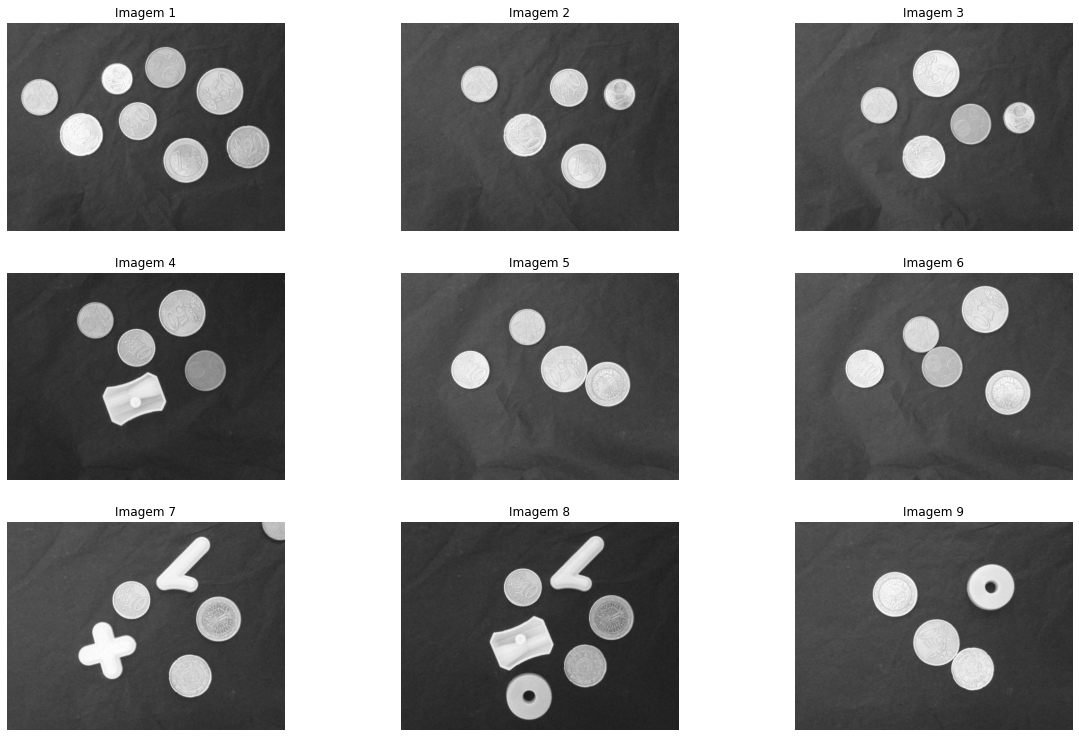

In [152]:
imagensCanalRED = [None] * N_IMAGES

for index in range(N_IMAGES):
    imagensCanalRED[index] = imagensOriginais[index][:, :, 2]
    
plot_images(imagensCanalRED)

#### Obtenção do limiar (threshold) para a binarização das imagens e respetiva conversão

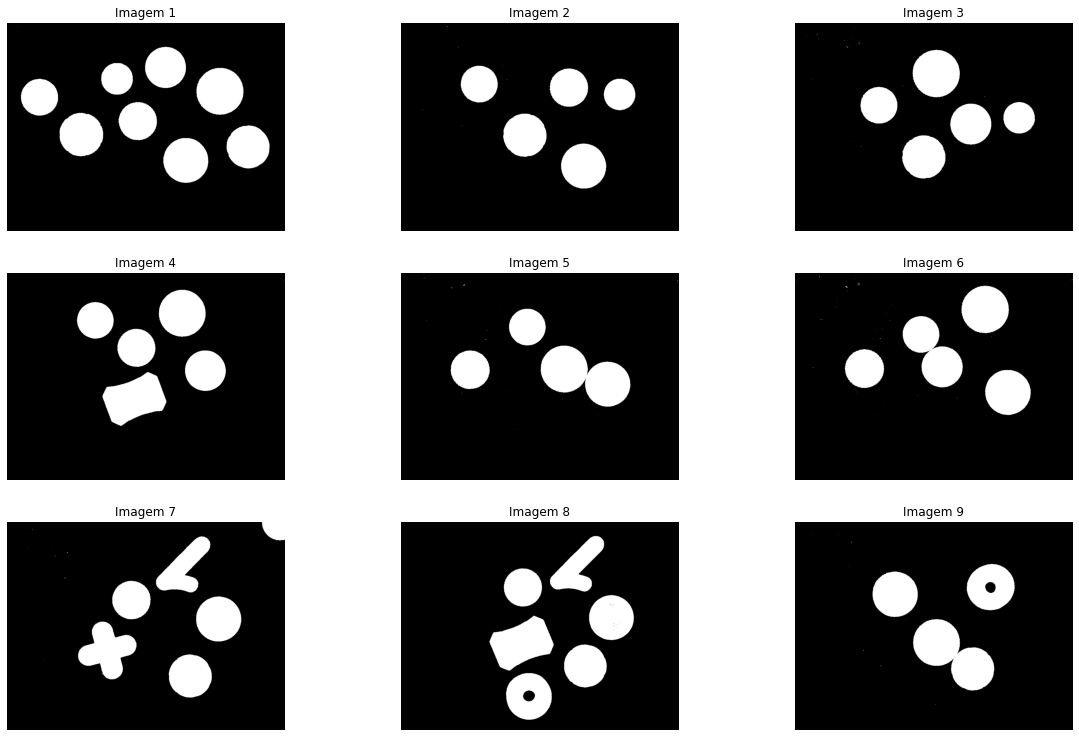

In [153]:
imagensBinarias = [None] * N_IMAGES
imagensThresholds = [None] * N_IMAGES

for index in range(N_IMAGES):
    imagensThresholds[index], imagensBinarias[index] = cv2.threshold(imagensCanalRED[index], 100, 255, cv2.THRESH_BINARY)
    
plot_images(imagensBinarias)

#### Correção/melhoramento das imagens usando operações morfológicas

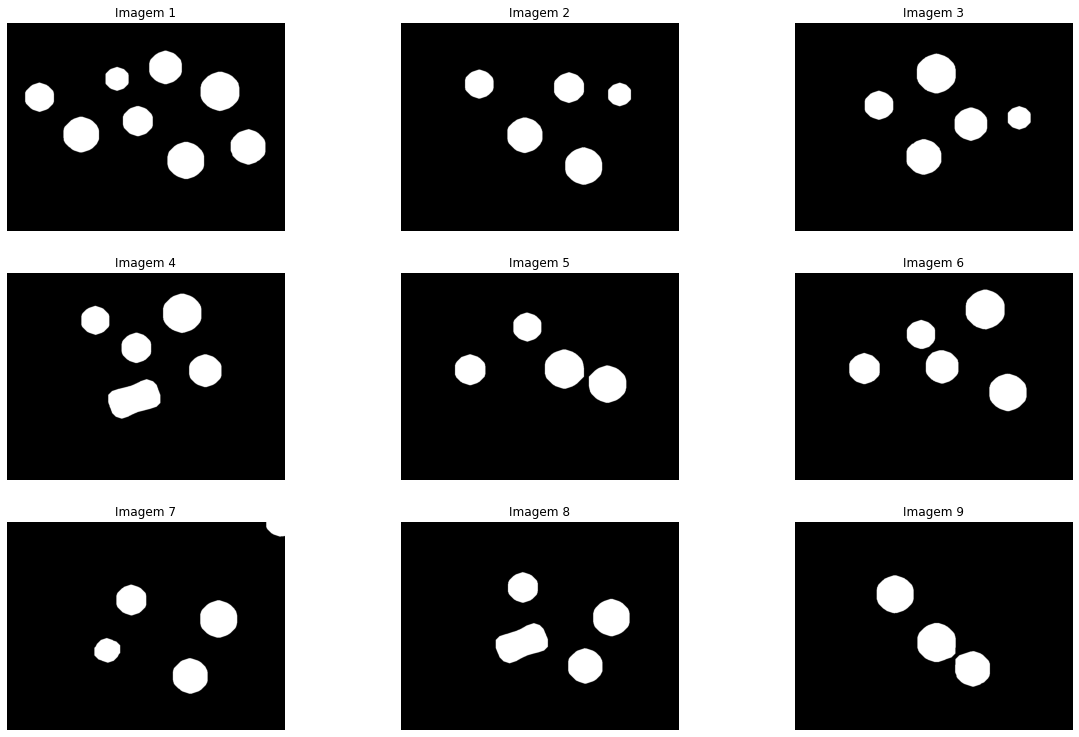

In [154]:
maskClose = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
maskErode = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
maskDilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

imagensPosOperacoesMorfologicas = [None] * N_IMAGES

for index in range(N_IMAGES):

    imagensPosOperacoesMorfologicas[index] = cv2.morphologyEx(imagensBinarias[index], cv2.MORPH_CLOSE, maskDilate)
    imagensPosOperacoesMorfologicas[index] = cv2.erode(imagensPosOperacoesMorfologicas[index], maskErode, iterations=7)    
    imagensPosOperacoesMorfologicas[index] = cv2.dilate(imagensPosOperacoesMorfologicas[index], maskDilate, iterations=7)
    
plot_images(imagensPosOperacoesMorfologicas)

#### Criação das máscaras

In [155]:
valorMoedasOrdenado = [0.01, 0.02, 0.05, 0.10, 0.20, 0.50, 1.0, 2.0]
moedas = {}

for index in range(len(valorMoedasOrdenado)):
    moeda = {"Moeda " + str(f"{valorMoedasOrdenado[index]:.2f}") : valorMoedasOrdenado[index]}
    
    moedas.update({"Moeda " + str(f"{valorMoedasOrdenado[index]:.2f}") : moeda})
    
moedas

{'Moeda 0.01': {'Moeda 0.01': 0.01},
 'Moeda 0.02': {'Moeda 0.02': 0.02},
 'Moeda 0.05': {'Moeda 0.05': 0.05},
 'Moeda 0.10': {'Moeda 0.10': 0.1},
 'Moeda 0.20': {'Moeda 0.20': 0.2},
 'Moeda 0.50': {'Moeda 0.50': 0.5},
 'Moeda 1.00': {'Moeda 1.00': 1.0},
 'Moeda 2.00': {'Moeda 2.00': 2.0}}

#### Classificação

In [156]:
def classificadorMoedas(areaMoeda):   
    #Moeda 0.01
    if areaMoeda >= 5600 and areaMoeda <= 6000:
        return moedas.get("Moeda 0.01"), 0.01
    
    #Moeda 0.02
    if areaMoeda >= 8400 and areaMoeda <= 9000:
        return moedas.get("Moeda 0.02"), 0.02
    
    #Moeda 0.05
    if areaMoeda >= 11000 and areaMoeda <= 12000:
        return moedas.get("Moeda 0.05"), 0.05
    
    #Moeda 0.10
    if areaMoeda >= 9400 and areaMoeda <= 10500:
        return moedas.get("Moeda 0.10"), 0.10
    
    #Moeda 0.20
    if areaMoeda >= 12500 and areaMoeda <= 13500:
        return moedas.get("Moeda 0.20"), 0.20
    
    #Moeda 0.50
    if areaMoeda >= 15800 and areaMoeda <= 16700:
        return moedas.get("Moeda 0.50"), 0.50
    
    #Moeda 1.00
    if areaMoeda >= 14100 and areaMoeda <= 15300:
        return moedas.get("Moeda 1.00"), 1.0
    
    #Moeda 2.00
    if areaMoeda >= 17000 and areaMoeda <= 18600:
        return moedas.get("Moeda 2.00"), 2.0

In [157]:
valorImagens = [None] * N_IMAGES
valorTotalImagens = np.zeros(N_IMAGES)

for index in range(N_IMAGES):
    numLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(imagensPosOperacoesMorfologicas[index], 8, cv2.CV_32S)

    valorImagem = {}
    valorTotal = 0
    
    for i in range(numLabels):
        
        if i != 0:
            
            area = stats[i, cv2.CC_STAT_AREA]            
            valor = classificadorMoedas(area)
                
            if valor is not None:
                valorImagem.update({"moeda " + str(i - 1) : valor[0]})
                valorTotal = valorTotal + valor[1]
    
    valorImagens[index] = valorImagem
    valorTotalImagens[index] = round(valorTotal, 2)

#### Comparação com os valores reais

In [158]:
valoresReais = [2.08, 1.33, 0.78, 0.67, 1.62, 1.67, 1.30, 1.30, 1.70]
table = np.stack([valoresReais, valorTotalImagens], axis=-1)
print(tabulate(table, headers=['Reais', 'Obtidos']))

  Reais    Obtidos
-------  ---------
   2.08       2.08
   1.33       1.33
   0.78       0.78
   0.67       0.67
   1.62       1.62
   1.67       1.67
   1.3        1.3
   1.3        1.3
   1.7        1.7


#### Cálculo para a moeda de 2 euros

In [159]:
# Calculo da Area Real das Moedas
areaCentimo1 = np.pi * (16.25/2)**2 #1 Centimo
areaCentimo2 = np.pi * (18.75/2)**2 #2 Centimos
areaCentimo5 = np.pi * (21.25/2)**2 #5 Centimos
areaCentimo10 = np.pi * (19.75/2)**2 #10 Centimos
areaCentimo20 = np.pi * (22.25/2)**2 #20 Centimos
areaCentimo50 = np.pi * (24.25/2)**2 #50 Centimos
areaEuro1 = np.pi * (23.25/2)**2 #1 Euro
areaEuro2 = np.pi * (25.75/2)**2 #2 Euro

# Area Minima das Moedas
areaMinimaEuro2 = np.zeros(7)

areaMinimaEuro2[0] = areaEuro2 * 5727. / areaCentimo1
areaMinimaEuro2[1] = areaEuro2 * 8581. / areaCentimo2
areaMinimaEuro2[2] = areaEuro2 * 11305. / areaCentimo5
areaMinimaEuro2[3] = areaEuro2 * 9557. / areaCentimo10
areaMinimaEuro2[4] = areaEuro2 * 12796. / areaCentimo20
areaMinimaEuro2[5] = areaEuro2 * 16056. / areaCentimo50
areaMinimaEuro2[6] = areaEuro2 * 14456. / areaEuro1

# Area Maxima das Moedas
areaMaximaEuro2 = np.zeros(7)

areaMaximaEuro2[0] = areaEuro2 * 5910. / areaCentimo1
areaMaximaEuro2[1] = areaEuro2 * 8842. / areaCentimo2
areaMaximaEuro2[2] = areaEuro2 * 11731. / areaCentimo5
areaMaximaEuro2[3] = areaEuro2 * 10078. / areaCentimo10
areaMaximaEuro2[4] = areaEuro2 * 13444. / areaCentimo20
areaMaximaEuro2[5] = areaEuro2 * 16434. / areaCentimo50
areaMaximaEuro2[6] = areaEuro2 * 14941. / areaEuro1

#Arranjar Minimos e Máximos para a Moeda de 2 Euros
minimoEuro2 = np.min(areaMinimaEuro2[areaMinimaEuro2 > 16700])
maximoEuro2 = np.max(areaMaximaEuro2[(areaMaximaEuro2 > minimoEuro2) & (areaMaximaEuro2 < 18600)])

# Conclusão

<p> Com a finalização deste trabalho prático, provou-se a possibilidade de identificar moedas ou até outro objeto usando algoritmos de processamento de imagem, fornecidos pela biblioteca OpenCV. No entanto, é importante ressaltar que todo este trabalho apenas usou imagens com um conjunto de características muito restritas, diminuíndo a sua taxa de sucesso no caso de utilização de imagens que fujam deste conjunto, abrindo assim a possibilidade para melhoramento do mesmo. Dessa forma, concluí-se que os objetivos para este trabalho prático foram alcançados na sua totalidade.

## Bibliografia

<ul>
<li> https://www.bportugal.pt/FormacaoOnline/Moedas/pt/modulo1/01-unidade1/04-dimensao-e-cor.html </li>
<li> https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#void%20cvtColor%28InputArray%20src,%20OutputArray%20dst,%20int%20code,%20int%20dstCn%29 </li>
<li> Slides fornecidos pelo docente da unidade curricular
</ul>